# CSCI 5822 Assignment 2 


<div class="alert alert-block alert-danger">

<b>Assigned:</b> Feb 5, 2021.

<b>Due:</b> Feb 19 (11:59pm, MST), on Canvas.

<b>Update:</b> You can use Word/Pages/TeX Editors to typeset the theory part and export to PDF. 

</div>

You have the option to solve the assignment in place and upload the notebook as PDF (`via "File" -> "Download as" -> "PDF via LaTeX (.pdf)"`) file. OR, use the notebook as a worksheet and upload your answers as a separated, typed PDF file. You may get partial points if you append the notebook to that file.


Do not forget to edit your name here.

<div class="alert alert-block alert-success">

<b>Name:</b> Alex Book
    
<b>Collaborated With:</b> Cole Sturza

</div>

The collaboration/anti-plagiarism policy for this course can be found in the syllabus statements.

The questions  provided  below will ask you to either write code or 
write answers in the form of markdown. Markdown syntax guide is here: [click here](https://www.markdownguide.org/basic-syntax/). [This page](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/) has some nice snippets for writing math equations in Jupyter Notebook.

----

We will follow the following grading rubrics.
+ 10: correct answer, work is shown and clear
+ 8: correct answer but work might be difficult to read
+ 6: incorrect answer but good attempt
+ 4: mediocre attempt or very difficult to read
+ 2: problem is written down, no attempt to solve
+ 0: problem is not written down


__Double click anywhere on this box to find out how your instructor typeset it. Press Shift+Enter to go back.__


<div class="alert alert-block alert-info">
<b>Task 1:</b> (Theory - 10 points).

Consider an adjacency matrix $\mathbf{A}$ with elements $\lbrack \mathbf{A} \rbrack_{ij} = 1$ if one can reach state $i$ from state $j$ in one timestep, and $0$ otherwise. 
    
Show that the matrix $\lbrack \mathbf{A}^k \rbrack_{ij}$ represents the number of paths that lead from state $j$ to $i$ in $k$ timesteps. Hence derive an algorithm that will find the minimum number of steps to get from state $j$ to state $i$.


</div>

## Solution (Expected Length: 3 lines)

$\mathbf{A}^2$ gives us the number of paths of length 2 from $i$ to $j$. This is because when multiplying an adjancency matrix by itself, the $i,j$ cell will hold the inner/dot product of row $i$ and row $j$ (rows and columns are equivalent, as adjacency matrices are symmetrical along the diagonal, so row $j$ is equivalent to column $j$). Thus, for $\mathbf{A}^2$, if $i$ and $j$ share a neighbor, there exists a path of length 2 from $i$ to $j$ (two non-zero numbers will be multiplied together, yielding a non-zero number in the resultant $i,j$ cell). This works as you continue to multiply $\mathbf{A}$ by itself, where for $\mathbf{A}^3$, the neighbors of $i$ and $j$ themselves share a neighbor (leading to a path of length 3), and so on.

Algorithm to derive the minimum number of steps to get from state $j$ to state $i$:

In [1]:
def find_min_steps(A, i, j):
    current_A = A
    k = 1
    while current_A[i][j] == 0:
            current_A *= A
            k += 1
    return k

<div class="alert alert-block alert-info">
<b>Task 2:</b> (Theory - 5 points).

Show that for a connected graph that is singly-connected, the number of edges $E$ must be equal to the number of nodes minus $1$, $E = V − 1$. Give an example graph with $E = V − 1$ that is not singly-connected. Hence the condition $E = V − 1$ is a necessary but not sufficient condition for a graph to be singly-connected.

</div>

## Solution (Expected Length: 1 line)

If a given graph $G = (V,E)$ is singly-connected, it must be acyclic, having only one path from any vertex $V_i$ to any other vertex $V_j$. Thus, there must not be a repeated connection between any two vertices. Such a graph would have a number of edges equal to the number of vertices minus one (as if there were more than that number of edges, there must be some repeated connection). If another edge was added to such a graph, a cycle would be formed. If any edge was removed, the graph would no longer hold complete paths to every vertex. In both situations, deviating from a number of edges $E = V - 1$ loses the graph its singly-connected status. Thus, a singly-connected graph must have the number of edges $E = V - 1$ exactly.

To show that the given condition is necessary but not sufficient to prove a graph to be singly-connected, take the a graph $\mathbf{G}$ that has two disconnected components. One of the components forms a triangle (3 vertices, 3 edges) and the other component is simply two vertices connected to each other (2 vertices, 1 edge). This graph has $V= 5$ vertices and $E = V - 1 = 4$ edges, but is not singly-connected.

<div class="alert alert-block alert-info">
<b>Task 3:</b> (Theory - 10 points).

Explain how to construct a graph with $N$ nodes, where $N$ is even, that contains at least $(N/2)^2$ maximal cliques.


</div>

## Solution (Expected Length: 2 lines)

Take the nodes and form a regular polygon (all nodes on the perimeter of the shape, equal distance between neighboring nodes, equal angles formed by the  perimeter edges). Allow "steps" to refer to the number of perimeter edges that must be traversed in order to reach one node from another (e.g. there is 1 step between initially neighboring nodes). Connect each node to every other node that lies an odd number of steps away. Once this process is complete, each node will then be connected to $\frac{N}{2}$ other nodes. Multiplying this by the number of nodes $N$ yields $\frac{N^2}{2}$ total cliques. However, we must then divide this quanity by 2, as each clique contains 2 nodes, and will thus be double-counted. This leaves us with $(\frac{N}{2})^2$ total maximal cliques of size 2.

<div class="alert alert-block alert-info">
<b>Task 4:</b> (Theory - 5 points).

Consider the distribution $p(a, b, c) = p(c \mid a, b)p(a)p(b)$. 
    
(i) Is $a \perp\!\!\!\perp b \mid \varnothing$? 
    
(ii) Is $a \perp\!\!\!\perp b \mid c$?


</div>

## Solution (Expected Length: 1 line each)

In the given distribution, $c$ is a collider with $a$ and $b$ as its parents. So unlesss we condition on $c$, the path from $a$ to $b$ is blocked (making them conditionally independent). Therefore, (i) is $\textbf{yes}$ and (ii) is $\textbf{no}$.

<div class="alert alert-block alert-info">
<b>Task 5:</b> (Theory - 20 points, 5 each).

The Chest Clinic network (see [this Ref.](http://www.jstor.org/stable/2345762)) concerns the diagnosis of lung disease (`tuberculosis`, `lung cancer`, or `both`, or `neither`), see the figure below. In this model a visit to Asia is assumed to increase the probability of tuberculosis. State if the following conditional independence relationships are _`true`_ or _`false`_

1. `tuberculosis` $\perp\!\!\!\perp$ `smoking` $\mid$ `shortness of breath`

2. `lung cancer` $\perp\!\!\!\perp$ `bronchitis` $\mid$ `smoking`
    
3. `visit to Asia` $\perp\!\!\!\perp$ `smoking` $\mid$ `lung cancer`
    
4. `visit to Asia` $\perp\!\!\!\perp$ `smoking` $\mid$ `lung cancer`, `shortness of breath`
    
    

</div>

<div class="alert alert-block alert-warning">
<b>Belief network structure for the Chest Clinic example.</b>

* x = Positive X-ray
* d = Dyspnea (Shortness of breath)
* e = Either Tuberculosis or Lung Cancer
* t = Tuberculosis 
* l = Lung Cancer
* b = Bronchitis
* a = Visited Asia 
* s = Smoker

FYI: see [the gist](https://gist.github.com/junipertcy/b4cde5d9d6db4c7aa5a84ab3eec4a89d) for the source code to plot the network.
    
</div>

In [3]:
from IPython.display import Image
Image(url="https://gist.githubusercontent.com/junipertcy/b4cde5d9d6db4c7aa5a84ab3eec4a89d/raw/b9df67a666795db51d2542af86ce886ee721cc1a/chest_clinic.png")

## Solution (Expected Length: 4 lines for each subtask)

### 1.
$t \perp\!\!\!\perp s \mid d$

path 1: $t - e - l - s$

$e$ is a collider and its descendant $d$ is in the conditioning set, so it $\textbf{doesn't block the path}$

$l$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

path 2: $t - e - d - b - s$

$e$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

$d$ is a collider and is in the conditioning set, so it $\textbf{doesn't block the path}$

$b$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

Not all paths between $t$ and $s$ are blocked, so $t$ and $s$ are d-connected and thus are $\textbf{not conditionally independent}$. The given independence relationship is $\textbf{false}$.

### 2.
$l \perp\!\!\!\perp b \mid s$

path 1: $l - s - b$

$s$ isn't a collider but is in the conditioning set, so it $\textbf{blocks the path}$

path 2: $l - e - d - b$

$e$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

$d$ is a collider but neither it nor its descendants (of which it has none) are in the conditioning set, so it $\textbf{blocks the path}$

All paths between $l$ and $b$ are blocked, so $l$ and $b$ are d-separated and thus are $\textbf{conditionally indepedent}$. The given independence relationship is $\textbf{true}$.

### 3.
$a \perp\!\!\!\perp s \mid l$

path 1: $a - t - e - l - s$

$t$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

$e$ is a collider but neither it nor its descendants are in the conditioning set, so it $\textbf{blocks the path}$

$l$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

path 2: $a - t - e - d - b - s$

$t$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

$e$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

$d$ is a collider but neither it nor its descendants (of which it has none) are in the conditioning set, so it $\textbf{blocks the path}$

$b$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

All paths between $a$ and $s$ are blocked, so $a$ and $s$ are d-separated and thus are $\textbf{conditionally independent}$. The given independence relationship is $\textbf{true}$.

### 4.
$a \perp\!\!\!\perp s \mid l, d$

path 1: $a - t - e - l - s$

$t$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

$e$ is a collider and either it or one of its descendants (in this case, $d$) are in the conditioning set, so it $\textbf{doesn't block the path}$

$l$ isn't a collider but is in the conditioning set, so it $\textbf{blocks the path}$

path 2: $a - t - e - d - b - s$

$t$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

$e$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

$d$ is a collider and is in the conditioning set, so it $\textbf{doesn't block the path}$

$b$ isn't a collider and isn't in the conditioning set, so it $\textbf{doesn't block the path}$

Not all paths between $a$ and $s$ are blocked, so $a$ and $s$ are d-connected and thus are $\textbf{not conditionally independent}$. The given independence relationship is $\textbf{false}$.

<div class="alert alert-block alert-info">
<b>Task 6:</b> (Theory - 25 points, 5 each).
    
This task explores the distinction between d-connection and dependence. Consider the distribution class

$$ p(a, b, c) = p(c \mid b) p(b \mid a) p(a) \ ,$$

for which $a$ is d-connected to $c$. One might expect that this means that $a$ and $c$ are dependent, $a \top\!\!\!\top c$. Our interest is to show that there are non-trivial distributions for which $a \perp\!\!\!\perp c$.

</div>

<div class="alert alert-block alert-info">    
    
(1) Consider $dom(a) = dom(c) = \lbrace 1, 2 \rbrace$ and $dom(b) = \lbrace 1, 2, 3 \rbrace$. 
    
For

$$p(a) = \begin{pmatrix} 3/5 \\ 2/5  \end{pmatrix}\ , \  p(b \mid a) = \begin{pmatrix} 1/4 && 15/40 \\ 1/12 && 1/8 \\ 2/3 && 1/2  \end{pmatrix} \ , \ p(c \mid b) = \begin{pmatrix} 1/3 && 1/2 && 15/40 \\ 2/3 && 1/2 && 5/8  \end{pmatrix}$$
    
show that $a \perp\!\!\!\perp c$.

</div>

## Solution

In order to show that $a \perp\!\!\!\perp c$, we will show that $p(a,c) = p(a)p(c)$. To do so, we first need to marginalize over $b$.

So, $p(a,c) = \Sigma_{b}p(a,b,c) = \Sigma_{b}p(c|b)p(b|a)p(a)$.

We need to show that $p(a,c) = p(a)p(c)$ for all pairings of values for $a$ and $c$.

In [91]:
p_a = np.array([[3/5], [2/5]])
p_b_given_a = np.array([[1/4, 15/40], [1/12, 1/8], [2/3, 1/2]])
p_c_given_b = np.array([[1/3, 1/2, 15/40], [2/3, 1/2, 5/8]])
p_a_c = np.zeros((2, 2))
p_c = np.zeros(2)

# inner products along distribution to find p(a,c)
p_a_c[0][0] = np.sum([p_c_given_b[0] * p_b_given_a[:,0] * p_a[0]])
p_a_c[1][0] = np.sum([p_c_given_b[0] * p_b_given_a[:,1] * p_a[1]])
p_a_c[0][1] = np.sum([p_c_given_b[1] * p_b_given_a[:,0] * p_a[0]])
p_a_c[1][1] = np.sum([p_c_given_b[1] * p_b_given_a[:,1] * p_a[1]])

p_c[0] = np.sum(p_a_c[:,0])
p_c[1] = np.sum(p_a_c[:,1])

print('p(a,c):\n', p_a_c)
print('p(a=0, c=0) = ', p_a_c[0,0], " = p(a=0)p(c=0) = ", p_a[0]*p_c[0])
print('p(a=1, c=0) = ', p_a_c[1,0], " = p(a=1)p(c=0) = ", p_a[1]*p_c[0])
print('p(a=0, c=1) = ', p_a_c[0,1], " = p(a=0)p(c=1) = ", p_a[0]*p_c[1])
print('p(a=1, c=1) = ', p_a_c[1,1], " = p(a=1)p(c=1) = ", p_a[1]*p_c[1])

p(a,c):
 [[0.225 0.375]
 [0.15  0.25 ]]
p(a=0, c=0) =  0.22499999999999998  = p(a=0)p(c=0) =  [0.225]
p(a=1, c=0) =  0.15000000000000002  = p(a=1)p(c=0) =  [0.15]
p(a=0, c=1) =  0.37499999999999994  = p(a=0)p(c=1) =  [0.375]
p(a=1, c=1) =  0.25  = p(a=1)p(c=1) =  [0.25]


We have shown above that $p(a,c) = p(a)p(c)$ for all pairings of values for $a$ and $c$. Therefore, $a \perp\!\!\!\perp c$.

<div class="alert alert-block alert-info">    
    
(2) Consider 
    
$$p(a, b, c) = \frac{1}{Z}\phi(a, b)\psi(b, c)$$
    
for positive function $\phi$, $\psi$ and $Z = \sum_{a,b,c} \phi(a, b)\psi(b, c)$. 

Defining matrices $\mathbf{M}$ and $\mathbf{N}$ with elements
    
$$M_{ij} = \phi(a=i, b=j) \ , \ N_{kj} = \psi(b=j, c=k) \ ,$$
    
show that the marginal distribution $p(a = i, c = k)$ is represented by the matrix elements
    
$$p(a=i, c=k) = \frac{1}{Z} \lbrack \mathbf{M}\mathbf{N}^{T}\rbrack_{ik}$$

</div>

## Solution

We can represent the matrix multiplication $MN^{T}$ by element as follows (due to how matrix multiplication is represented element-wise as the inner product of rows and columns):

$[MN^{T}]_{ik} = \Sigma_{x=0}^j \phi(a = i, b = x) \psi(b = x, c = k)$

We can then marginalize over $b$, showing each possible state of $b$ as an integer $x$ s.t. $0 \leq x \leq j$:

$
\begin{align*}
p(a = i, c = k) &= \Sigma_{x=0}^j p(a = i, b = x, c = k) \\
&= \Sigma_{x=0}^j \frac{1}{Z} \phi(a = i, b = x) \psi(b = x, c = k) \\
&= \frac{1}{Z} \Sigma_{x=0}^j \phi(a = i, b = x) \psi(b = x, c = k)
\end{align*}
$

Using substitution with the two equations we have found, we can say:

$p(a = i, c = k) = \frac{1}{Z}[MN^{T}]_{ik}$

<div class="alert alert-block alert-info">    
    
(3) Show that if
    
$$\mathbf{M}\mathbf{N}^T = \mathbf{m}_0 \mathbf{n}_0^T$$
    
for some vectors $\mathbf{m}_0$ and $\mathbf{n}_0$, then $a \perp\!\!\!\perp c$.
    
</div>

## Solution

$
\begin{align*}
p(a = i, c = k) &= \frac{1}{Z}[MN^{T}]_{ik} \\
&= \frac{1}{Z}[\mathbf{m}_0 \mathbf{n}_0^T]_{ik} \\
&= \frac{1}{Z}\mathbf{m}_{0, i} \mathbf{n}_{0, k}^T
\end{align*}
$

Since we are now only dependent on variables $i$ and $k$ (no longer summing over values of $b$), we can say that $a \perp\!\!\!\perp c$.

<div class="alert alert-block alert-info">    
    
(4) Writing
    $$\mathbf{M} = \begin{pmatrix} \mathbf{m}_0 && \mathbf{m}_1 && \mathbf{m}_2 \end{pmatrix} \ , \ \mathbf{N} = \begin{pmatrix} \mathbf{n}_0 && \mathbf{n}_1 && \mathbf{n}_2 \end{pmatrix}$$
    
for two dimensional vectors $\mathbf{m}_i$, $\mathbf{n}_i$, $i = 0, \dots , 2$, show that
    
$$\mathbf{M}\mathbf{N}^T = \mathbf{m}_0 \mathbf{n}_0^T +  \mathbf{m}_1 \mathbf{n}_1^T +  \mathbf{m}_2 \mathbf{n}_2^T \ .$$
    
    
</div>

## Solution

$
\begin{align*}
\mathbf{M}\mathbf{N}^T &= 
\begin{bmatrix}
m_{0,0} & m_{1,0} & m_{2,0} \\
m_{0,1} & m_{1,1} & m_{2,1} \\
\vdots & \vdots & \vdots \\
m_{0,i} & m_{1,i} & m_{2,i} \\
\end{bmatrix} \cdot
\begin{bmatrix}
n_{0,0} & n_{1,0} & n_{2,0} \\
n_{0,1} & n_{1,1} & n_{2,1} \\
\vdots & \vdots & \vdots \\
n_{0,k} & n_{1,k} & n_{2,k} \\
\end{bmatrix} ^ T\\
&=
\begin{bmatrix}
m_{0,0} & m_{1,0} & m_{2,0} \\
m_{0,1} & m_{1,1} & m_{2,1} \\
\vdots & \vdots & \vdots \\
m_{0,i} & m_{1,i} & m_{2,i} \\
\end{bmatrix} \cdot
\begin{bmatrix}
n_{0,0} & n_{0,1} & \dots & n_{0,k} \\
n_{1,0} & n_{1,1} & \dots & n_{1,k} \\
n_{2,0} & n_{2,1} & \dots & n_{2,k} \\
\end{bmatrix}\\
&=
\begin{bmatrix}
m_{0,0}n_{0,0} + m_{1,0}n_{1,0} + m_{2,0}n_{2,0} & m_{0,0}n_{0,1} + m_{1,0}n_{1,1} + m_{2,0}n_{2,1} & \dots & m_{0,0}n_{0,k} + m_{1,0}n_{1,k} + m_{2,0}n_{2,k} \\
m_{0,1}n_{0,0} + m_{1,1}n_{1,0} + m_{2,1}n_{2,0} & m_{0,1}n_{0,1} + m_{1,1}n_{1,1} + m_{2,1}n_{2,1} & \dots & m_{0,1}n_{0,k} + m_{1,1}n_{1,k} + m_{2,1}n_{2,k} \\
\vdots & \vdots & \ddots & \vdots \\
m_{0,i}n_{0,0} + m_{1,i}n_{1,0} + m_{2,i}n_{2,0} & m_{0,i}n_{0,1} + m_{1,i}n_{1,1} + m_{2,i}n_{2,1} & \dots & m_{0,i}n_{0,k} + m_{1,i}n_{1,k} + m_{2,i}n_{2,k} \\
\end{bmatrix}\\
&=
\begin{bmatrix}
m_{0,0}n_{0,0} & m_{0,0}n_{0,1} & \dots & m_{0,0}n_{0,k} \\
m_{0,1}n_{0,0} & m_{0,1}n_{0,1} & \dots & m_{0,1}n_{0,k} \\
\vdots & \vdots & \ddots & \vdots \\
m_{0,i}n_{0,0} & m_{0,i}n_{0,1} & \dots & m_{0,i}n_{0,k} \\
\end{bmatrix} +
\begin{bmatrix}
m_{1,0}n_{1,0} & m_{1,0}n_{1,1} & \dots & m_{1,0}n_{1,k} \\
m_{1,1}n_{1,0} & m_{1,1}n_{1,1} & \dots & m_{1,1}n_{1,k} \\
\vdots & \vdots & \ddots & \vdots \\
m_{1,i}n_{1,0} & m_{1,i}n_{1,1} & \dots & m_{1,i}n_{1,k} \\
\end{bmatrix} + 
\begin{bmatrix}
m_{2,0}n_{2,0} & m_{2,0}n_{2,1} & \dots & m_{2,0}n_{2,k} \\
m_{2,1}n_{2,0} & m_{2,1}n_{2,1} & \dots & m_{2,1}n_{2,k} \\
\vdots & \vdots & \ddots & \vdots \\
m_{2,i}n_{2,0} & m_{2,i}n_{2,1} & \dots & m_{2,i}n_{2,k} \\
\end{bmatrix}\\
&= \mathbf{m}_0 \mathbf{n}_0^T +  \mathbf{m}_1 \mathbf{n}_1^T +  \mathbf{m}_2 \mathbf{n}_2^T
\end{align*}
$

Therefore, $\mathbf{M}\mathbf{N}^T = \mathbf{m}_0 \mathbf{n}_0^T +  \mathbf{m}_1 \mathbf{n}_1^T +  \mathbf{m}_2 \mathbf{n}_2^T$.

<div class="alert alert-block alert-info">    
(5) Show that by setting
    
$$ \mathbf{m}_1 = \lambda \mathbf{m}_0 , \  \mathbf{n}_2 = \gamma(\mathbf{n}_0 + \lambda \mathbf{n}_1)$$
    
for scalar $\lambda, \gamma$ then $\mathbf{M}\mathbf{N}^T$ can be written as $\mathbf{m}_* \mathbf{n}_*^T$ where
    
$$\mathbf{m}_* \equiv \mathbf{m}_0 + \gamma \mathbf{m}_2 , \  \mathbf{n}_* \equiv \mathbf{n}_0 + \lambda \mathbf{n}_1$$
    
    
</div>

## Solution

$
\begin{align*}
\mathbf{M}\mathbf{N}^T &= \mathbf{m}_0 \mathbf{n}_0^T +  \mathbf{m}_1 \mathbf{n}_1^T +  \mathbf{m}_2 \mathbf{n}_2^T \\
&= \mathbf{m}_0 \mathbf{n}_0^T +  \lambda \mathbf{m}_0 \mathbf{n}_1^T + \mathbf{m}_2 (\gamma(\mathbf{n}_0 + \lambda \mathbf{n}_1))^T \\
&= \mathbf{m}_0 \mathbf{n}_0^T +  \lambda \mathbf{m}_0 \mathbf{n}_1^T + \gamma \mathbf{m}_2 \mathbf{n}_0 ^T + \gamma \lambda \mathbf{m}_2 \mathbf{n}_1 ^T \\
&= \mathbf{m}_0 (\mathbf{n}_0 +  \lambda \mathbf{n}_1)^T + \gamma \mathbf{m}_2 (\mathbf{n}_0 + \lambda \mathbf{n}_1)^T \\
&= (\mathbf{m}_0 + \gamma \mathbf{m}_2) (\mathbf{n}_0 +  \lambda \mathbf{n}_1)^T \\
&= \mathbf{m}_* \mathbf{n}_*^T
\end{align*}
$

<div class="alert alert-block alert-info">
<b>Task 7:</b> (Theory - 5 points).

Alice and Bob share a bank account which contains an a priori unknown total amount of money $T$. Whenever Alice goes to the cash machine, the available amount for withdrawal $A$ for Alice is always $10\%$ of the total $T$ . Similarly, when Bob goes to the cash machine the available amount for withdrawal $B$ for Bob is $10\%$ of the total $T$. Whatever the amount in the bank, Alice and Bob check their available amounts for withdrawal independently. 
    
Draw a belief network that expresses this situation and show that $A \top\!\!\!\top B$.
    
</div>

## Solution (Expected Length: 1 line & 1 plot)

Alice and Bob's withdrawal amounts are dependent upon $T$, so in the representative belief network, both $A$ and $B$ must be children of $T$. The belief network would look as follows:

$A \xleftarrow{} T \xrightarrow{} B$

If $A \perp\!\!\!\perp B | \varnothing$ is not true, then it must be true that $A \top\!\!\!\top B$.

$A \perp\!\!\!\perp B | \varnothing$ is indeed false, as the the path from $A$ to $B$ is not blocked, since $T$ is not a collider and is also not in the conditioning set.

Therefore, $A \top\!\!\!\top B$.

<div class="alert alert-block alert-info">
<b>Task 8:</b> (Theory - Bonus, 10 points).

Let $N$ be divisible by $3$. Construct a graph with $N$ nodes by partitioning the nodes into $N/3$ subsets, each subset containing $3$ nodes. Then connect all nodes, provided they are not in the same subset. Show that such a graph has $3^{N/3}$ maximal cliques. This shows that a graph can have an exponentially large number of maximal cliques (see [this Ref](https://link.springer.com/article/10.1007/BF02760024)).
    
    

</div>

## Solution (Expected Length: 5 lines)


<div class="alert alert-block alert-info">
<b>Task 9:</b> (Programming - 10 points).

[WikiAdjSmall.mat](https://gist.github.com/junipertcy/b4cde5d9d6db4c7aa5a84ab3eec4a89d/raw/239197d724baef3bfc15567fbee9f91821eeb1ba/WikiAdjSmall.mat) contains a random selection of $1000$ Wiki authors, with a link between
two authors if they _know_ each other (see [wiki-Vote](snap.stanford.edu/data/wiki-Vote.html)).
    
Assume that if $i$ _knows_ $j$, then $j$ _knows_ $i$. Plot a histogram of the separation (the length of the shortest path between two users on the graph corresponding to the adjacency matrix) between all users based on separations from $1$ to $20$. That is the bin $n(s)$ in the histogram contains the number of pairs with separation $s$.


</div>

In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Solution (to use the following snippets, download the `WikiAdjSmall.mat` file first)
from scipy.io import loadmat
wiki_adj_small = loadmat("WikiAdjSmall.mat")
wiki_adj_small = wiki_adj_small["A"].toarray()
# print(wiki_adj_small.shape)

def symmetrize(A):
    for i in range(len(A)):
        for j in range(len(A[0])):
            if A[i][j] == 1:
                A[j][i] = 1
    return A

def found(A, i, j, path_length, path_counts):
    if A[i][j] == 0:
        A[i][j] = path_length
        A[j][i] = path_length
        path_counts[path_length] += 1
    return A, path_counts

A = symmetrize(wiki_adj_small)
current_A = A.copy()
shortest_path = np.zeros((1000, 1000))
path_counts = np.zeros(20)

for i in range(0, 20):
    # each step, check for all the non-zero entries, then multiply the current adjacency matrix with the original
    # [A^k]_{ij} represents the nodes i and j that can be connected in k timesteps
    path_indices = np.nonzero(current_A)
    for x in range(len(path_indices[0])):
        shortest_path, path_counts = found(shortest_path, path_indices[0][x], path_indices[1][x], i, path_counts)
    
    current_A = np.dot(current_A, A)

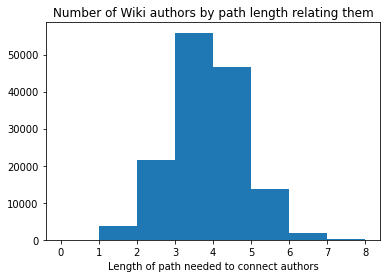

array([ 3796., 21527., 55888., 46679., 13709.,  1781.,    96.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.])

In [6]:
plot_this = []
for i in range(len(path_counts)):
    for j in range(int(path_counts[i])):
        plot_this.append(i+1)
        
plt.hist(plot_this, bins=np.arange(max(plot_this)+2))
plt.title('Number of Wiki authors by path length relating them')
plt.xlabel('Length of path needed to connect authors')
plt.show()
path_counts

<div class="alert alert-block alert-info">
<b>Task 10:</b> (Programming - 10 points + 5 bonus points).

Given two belief networks represented as DAGs with associated adjacency matrices $\mathbf{A}$ and $\mathbf{B}$, write a Python function `markov_equiv(A,B)` that returns $1$ if $\mathbf{A}$ and $\mathbf{B}$ are Markov equivalent, and zero otherwise. As a unit test, the function should return $1$ with the adjacency matrices of two belief networks given below. 
    
(5 bonus points) State/Explain that the $\mathbf{A}$ and $\mathbf{B}$ below are Markov equivalent.
    
</div>

In [39]:
## DO NOT EDIT THIS BLOCK
import numpy as np

a = np.zeros([9, 9], dtype=np.int_)
a[0, 2] = 1; a[0, 5] = 1; a[0, 3] = 1; a[1, 2] = 1; a[1, 4] = 1; a[2, 6] = 1; a[3, 7] = 1;
a[4, 2] = 1; a[4, 6] = 1; a[5, 7] = 1; a[5, 3] = 1; a[3, 8] = 1; a[6, 8] = 1;
print(f"Matrix A = \n{a}")

b = np.zeros([9, 9], dtype=np.int_)
b[0, 3] = 1; b[0, 2] = 1; b[1, 2] = 1; b[2, 6] = 1; b[3, 7] = 1; b[4, 6] = 1; b[4, 2] = 1; 
b[4, 1] = 1; b[5, 0] = 1; b[5, 3] = 1; b[5, 7] = 1; b[3, 8] = 1; b[6, 8] = 1;
print(f"Matrix B = \n{b}")
## END-DO NOT EDIT

Matrix A = 
[[0 0 1 1 0 1 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
Matrix B = 
[[0 0 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1]
 [0 1 1 0 0 0 1 0 0]
 [1 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


In [63]:
## Solution
def markov_equiv(a, b):
    # check if the symmetrized adj matrices are equal
    A = symmetrize(a.copy())
    B = symmetrize(b.copy())
    if np.array_equal(A, B):
        # check for arrays of equal shape
        if a.shape != b.shape:
            return 0
        # check if the two original graphs have the same immoralities
        immoralities_a = []
        immoralities_b = []
        for i in range(len(a)):
            for j in range(len(a[0])):
                for k in range(len(a)):
                    # disregard diagonal
                    if i != j:
                        # check if i and j are immoral parents of k
                        if a[i][k] == 1 and a[j][k] == 1 and a[i][j] == 0 and a[j][i] == 0:
                            # make sure this immorality isn't counted already
                            if [j,i,k] not in immoralities_a:
                                immoralities_a.append([i,j,k])
                        # repeat above steps for matrix b
                        if b[i][k] == 1 and b[j][k] == 1 and b[i][j] == 0 and b[j][i] == 0:
                            if [j,i,k] not in immoralities_b:
                                immoralities_b.append([i,j,k])
        print('Immoralities in A:', immoralities_a)
        print('Immoralities in B:', immoralities_b)
        # if the immoralities are equal, return 1
        if np.array_equal(immoralities_a, immoralities_b):
            return 1
        # otherwise, return 0
        return 0


## Test part
assert markov_equiv(a, b) == 1, "If you see this, something is wrong in `markov_equiv(*)`."

Immoralities in A: [[0, 1, 2], [0, 4, 2], [3, 6, 8]]
Immoralities in B: [[0, 1, 2], [0, 4, 2], [3, 6, 8]]


$A$ and $B$ are Markov equivalent because their skeletons (represented in the above code as symmetrized adjacency matrices) and immoralities are equal.